In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<font color = "blue">
<font size = 5>
1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv("Rose.csv",parse_dates = ['YearMonth'],index_col = 'YearMonth')

In [3]:
df

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


* There are 187 rows and 2 columns.
* The time series had 187 time periods data of month wise.

In [4]:
df.isna().sum()

Rose    2
dtype: int64

* The data is missing for two time periods.

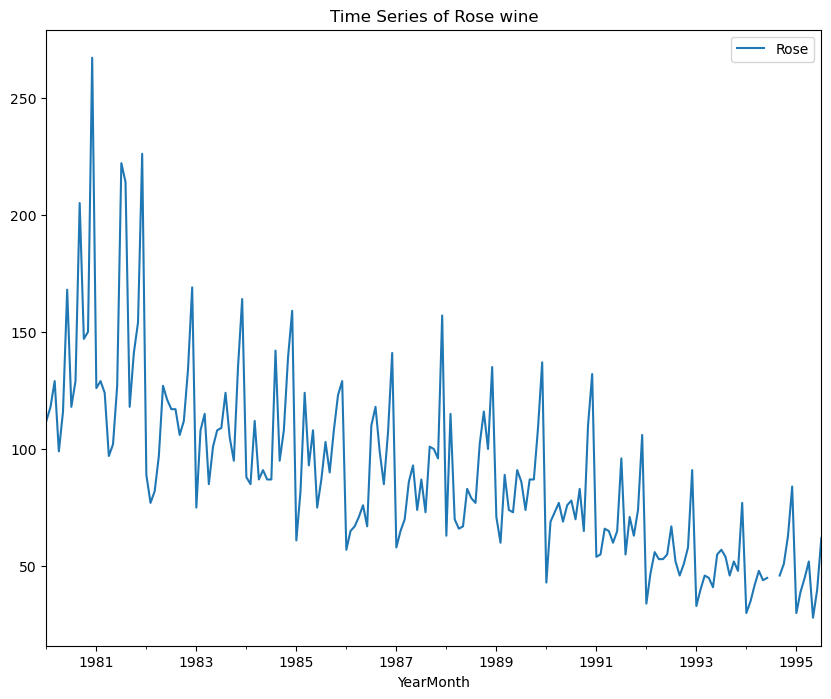

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
df.plot()
plt.title("Time Series of Rose wine")
plt.show()

* The data is missing for the year 1994. it has been imputed with spline method.

In [6]:
df['1994']

C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1884886999.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['1994']


,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0


In [7]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [8]:
df = df.interpolate(method='spline',order=1).round(0)

In [9]:
df['1994']

C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1884886999.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['1994']


,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,46.0
1994-08-01,47.0
1994-09-01,46.0


In [10]:
df.describe()

,Rose
count,187.000000
mean,89.925134
std,39.226318
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


**Observations-**
* There is a total of 187 time periods of data with a mean of 89.93 monthly.
* The Sales of rose wine is in the range of 28 to 267.

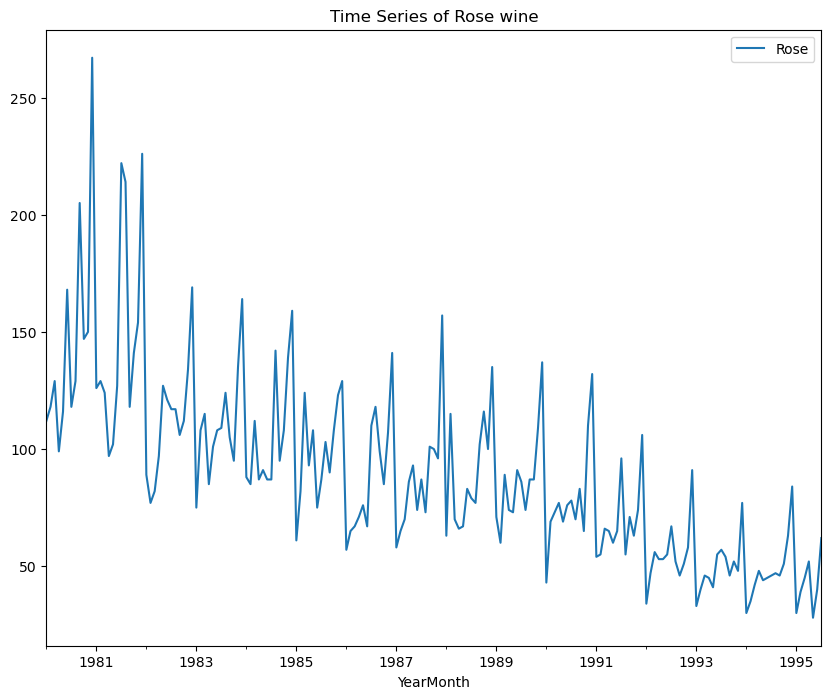

In [11]:
df.plot()
plt.title("Time Series of Rose wine")
plt.show()

* The plot shows that there is a seasonality and trend in the time series.

<font color = "blue">
<font size = 5>
2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

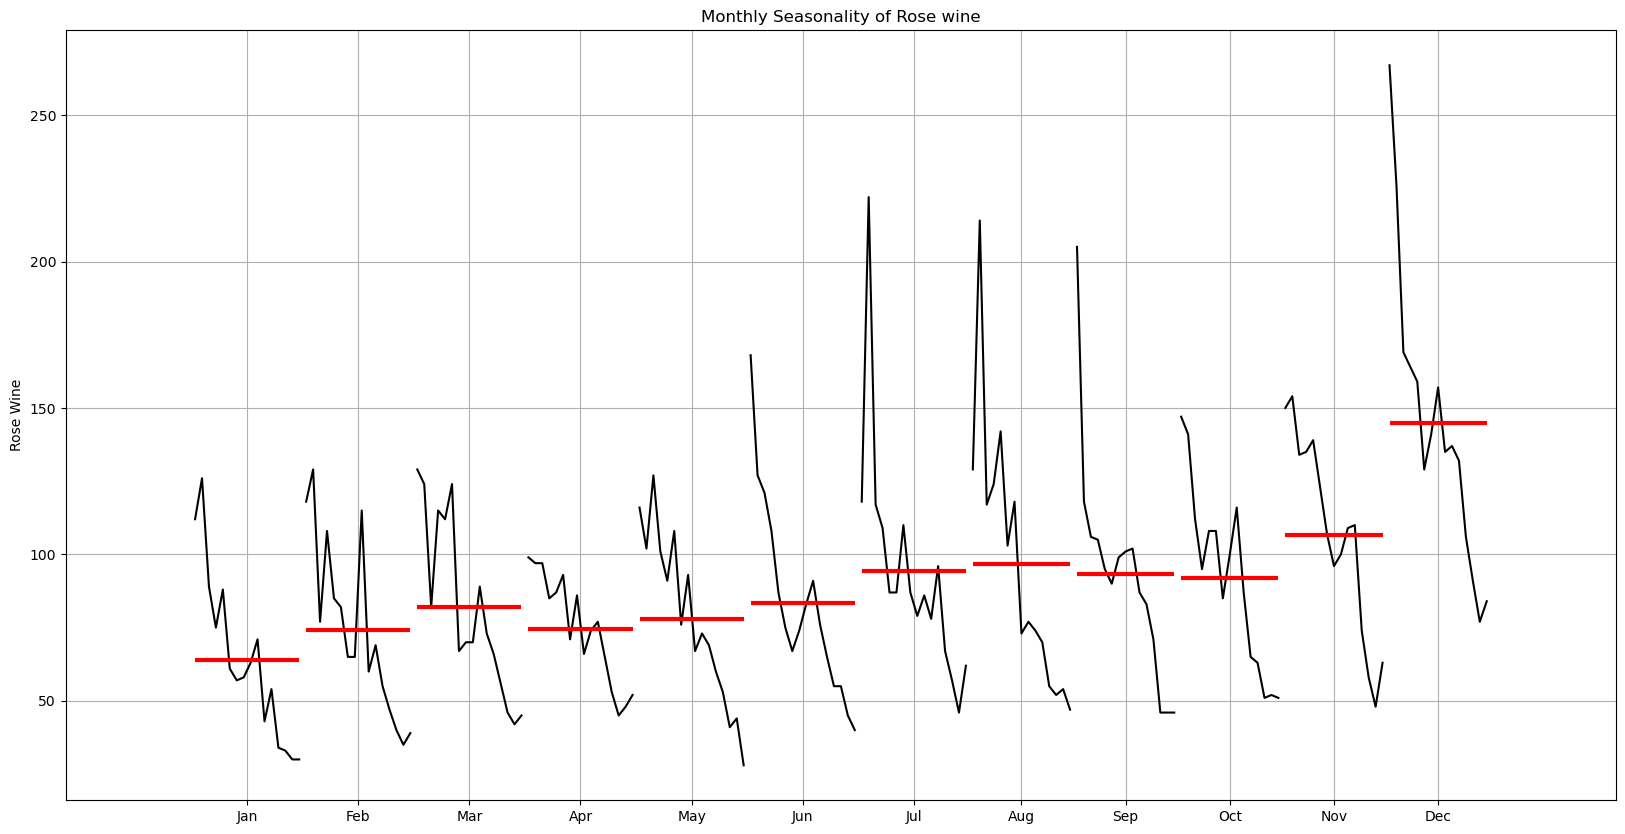

In [12]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(20,10))

month_plot(df,ylabel='Rose Wine',ax=ax)
plt.title("Monthly Seasonality of Rose wine")
plt.grid();

* The Above graph shows the seasonality of the months for all the years.
* It is clearly visible that the seasonality of sales is high in the months of Jul, Aug and Dec.

In [13]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Rose', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


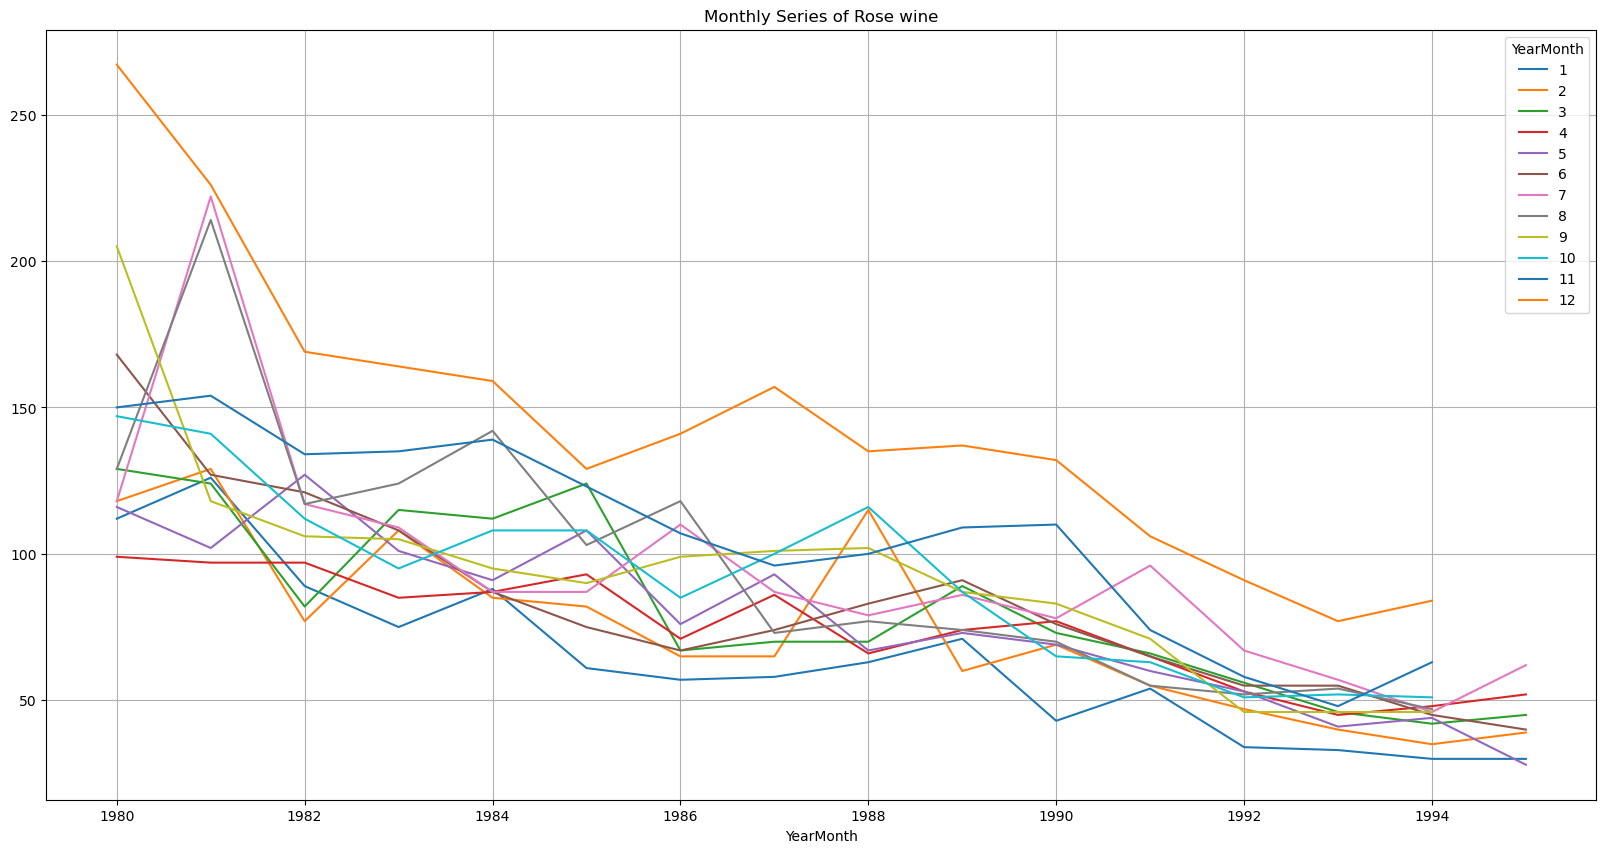

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
yearly_sales_across_months.plot(ax=ax)
plt.title("Monthly Series of Rose wine")
plt.grid();

* The monthly trend of wine sales shows that there is an downward trend eventhough the pattern are bit unusual.

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

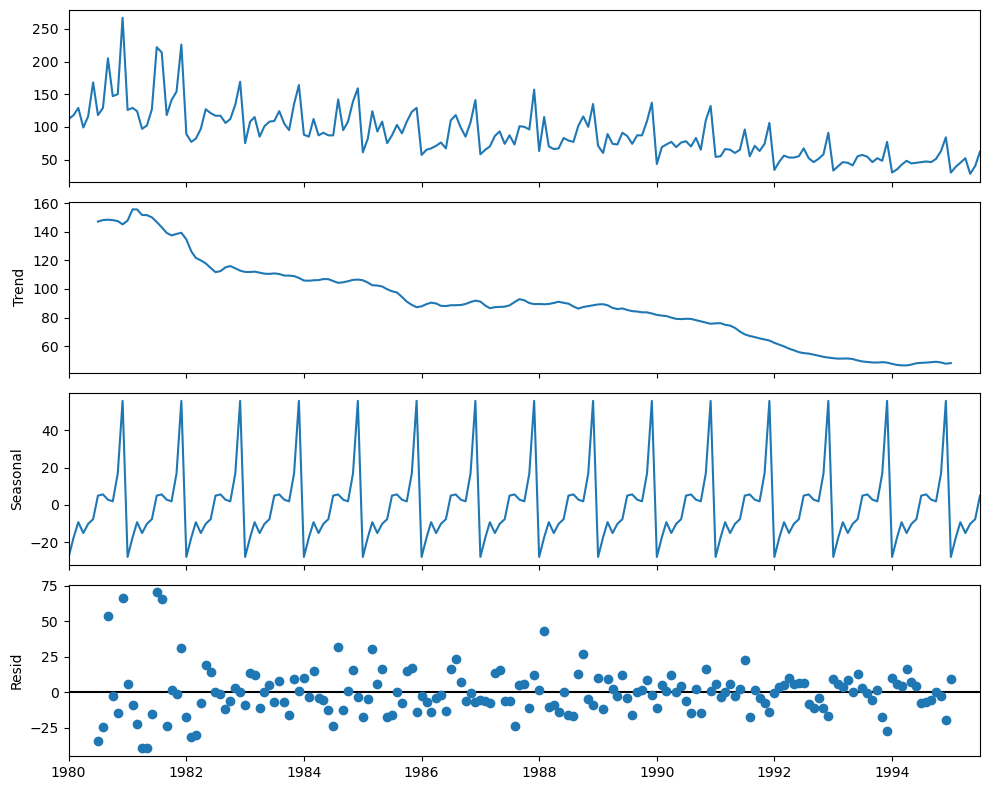

In [16]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

* From the initial plot, it is evident that the time series is addictive.
* After decomposition of time series, trend, seasonality and residual are split in the above plot.

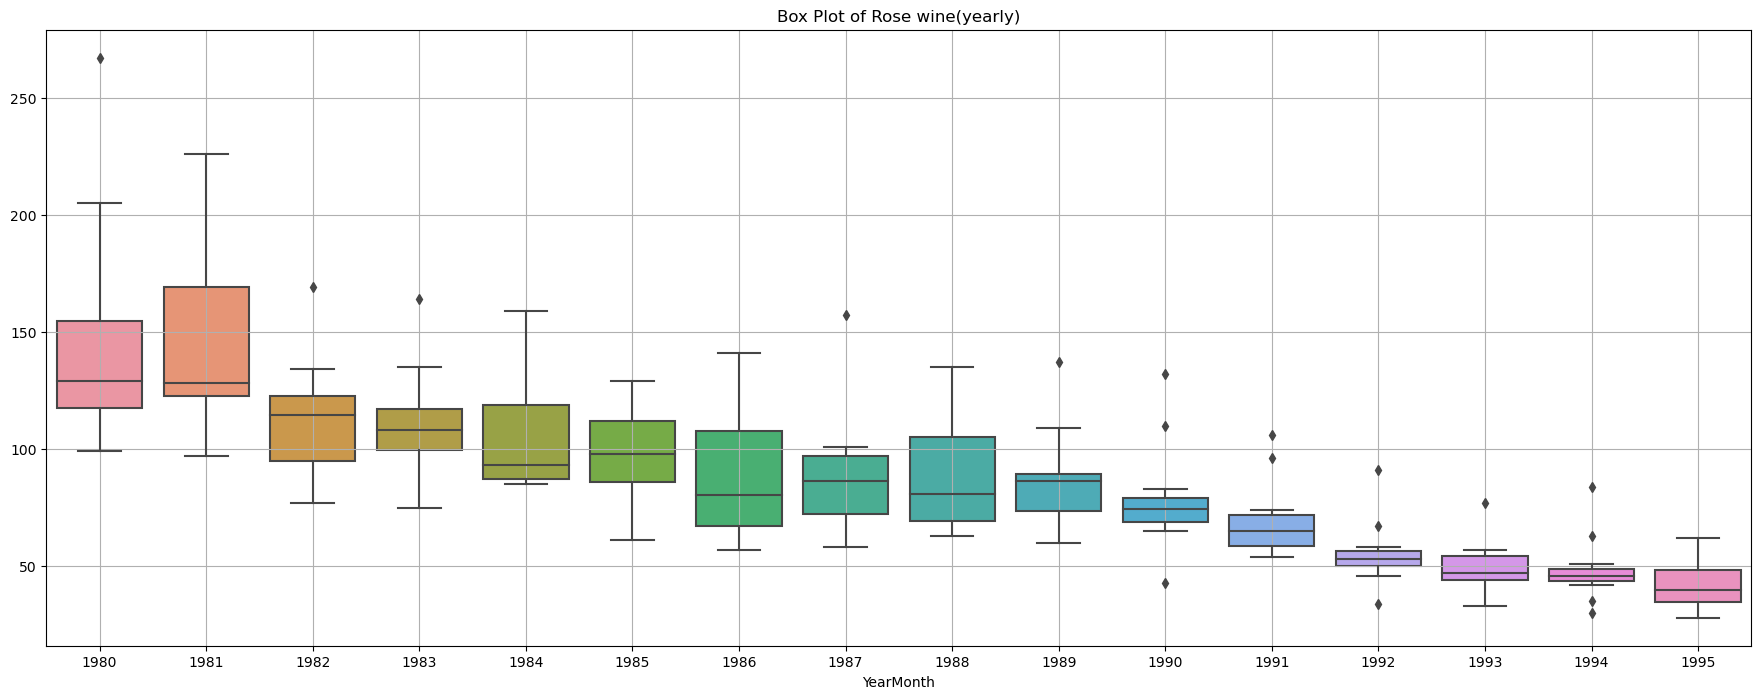

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title("Box Plot of Rose wine(yearly)")
plt.grid();

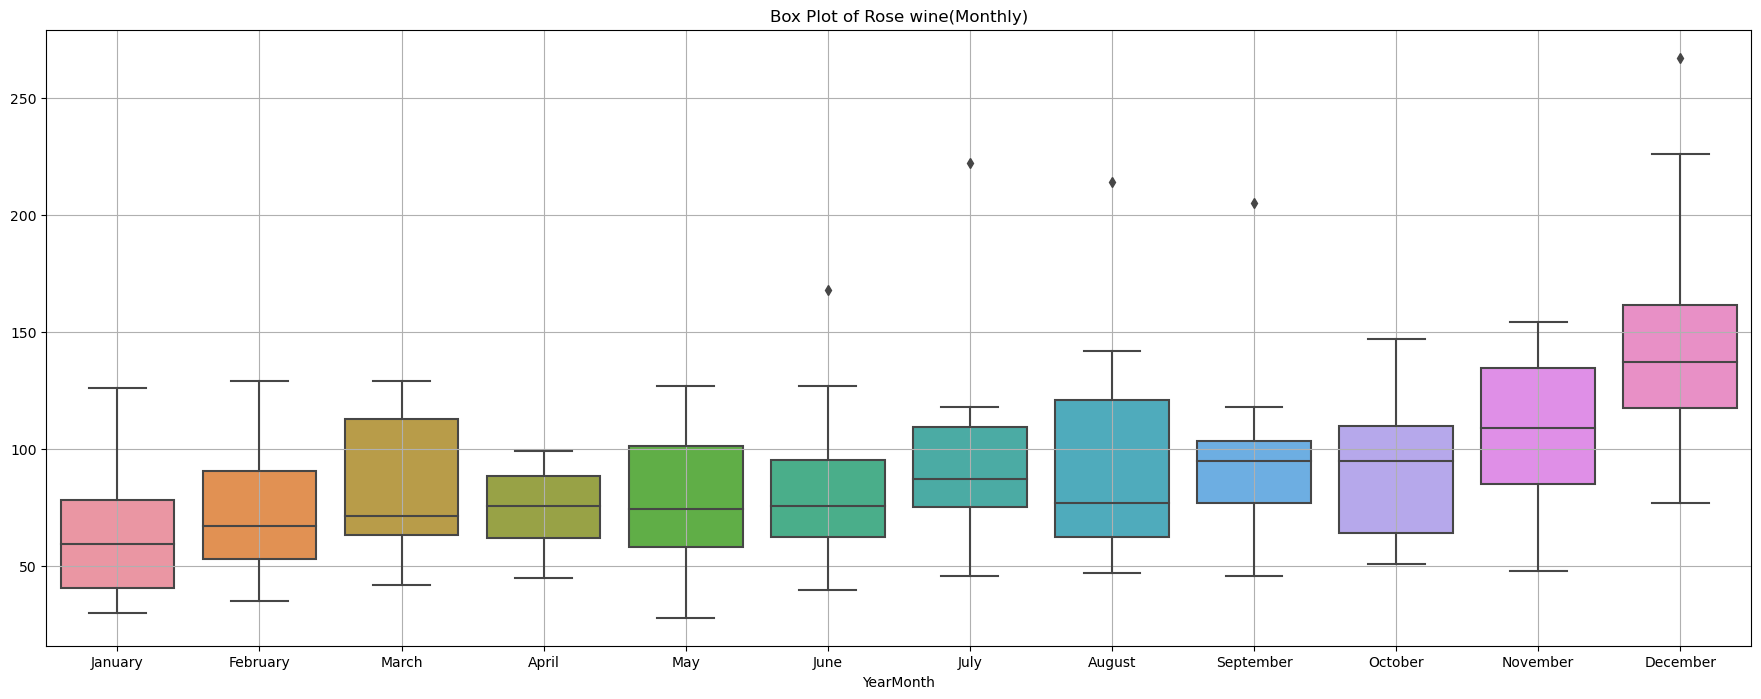

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.title("Box Plot of Rose wine(Monthly)")
plt.grid();

<font color = "blue">
<font size = 5>
3. Split the data into training and test. The test data should start in 1991.

* The train and test data are split with 1991 as the point of splitting criteria.

In [19]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [20]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


* The train data has 132 monthly data and test has 55 monthly data.

In [21]:
train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [22]:
test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [23]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


<font color = "blue">
<font size = 5>
4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression, naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [24]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [25]:
NaiveModel_train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [26]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

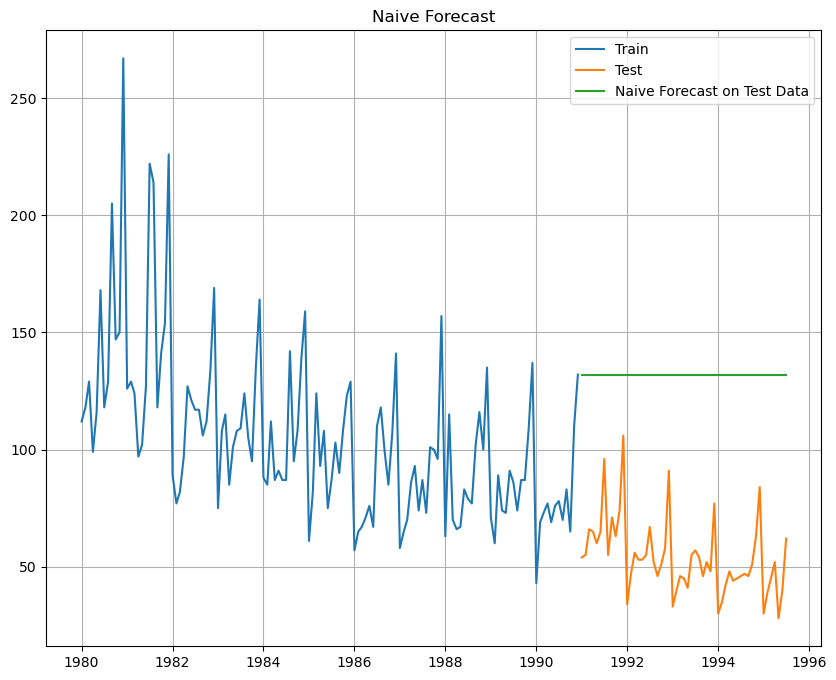

In [27]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [28]:
from sklearn import metrics

In [29]:
rmse_model_Naive_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_Naive_test))

For Naive forecast on the Test Data,  RMSE is 79.680


In [30]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model_Naive_test]},index=['Naive forecast'])
resultsDf

,Test RMSE
Naive forecast,79.679586


In [31]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [32]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


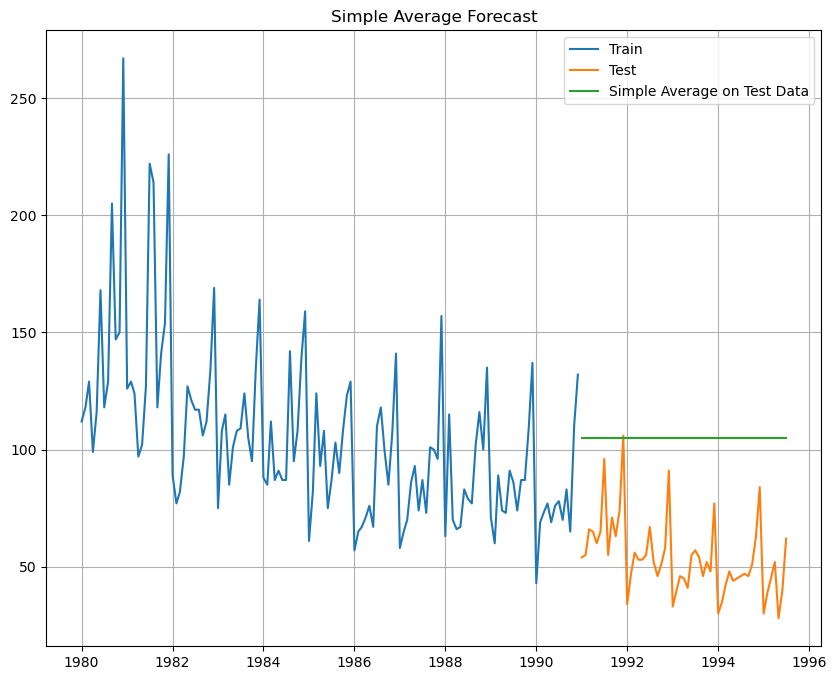

In [33]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [34]:
rmse_model_SAvg_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_SAvg_test))

For Simple Average forecast on the Test Data,  RMSE is 53.421


In [35]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model_SAvg_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
Naive forecast,79.679586
SimpleAverageModel,53.420540


In [36]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [37]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

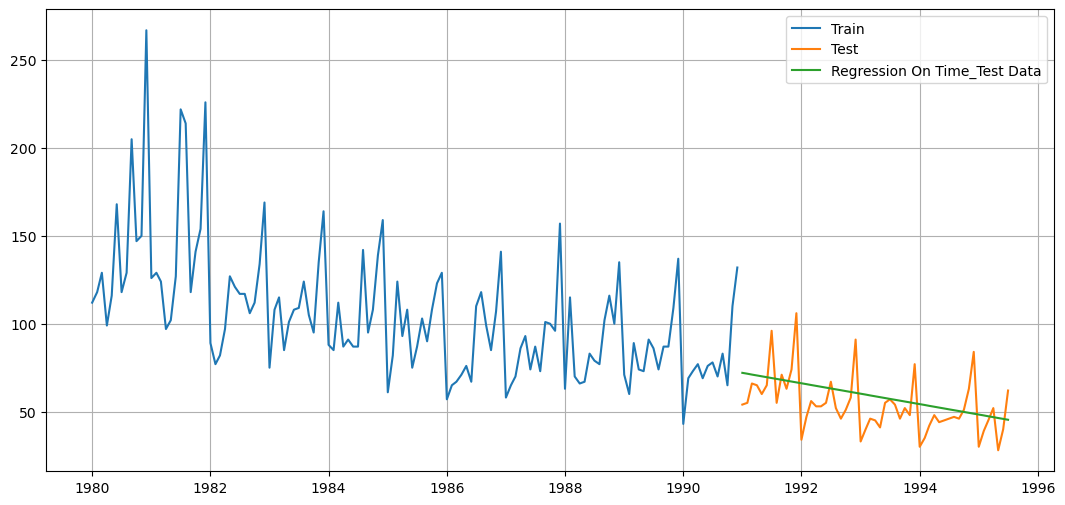

In [41]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [42]:
rmse_model_LR_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.26


In [43]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model_LR_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Naive forecast,79.679586
SimpleAverageModel,53.420540
RegressionOnTime,15.257380


In [44]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [45]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


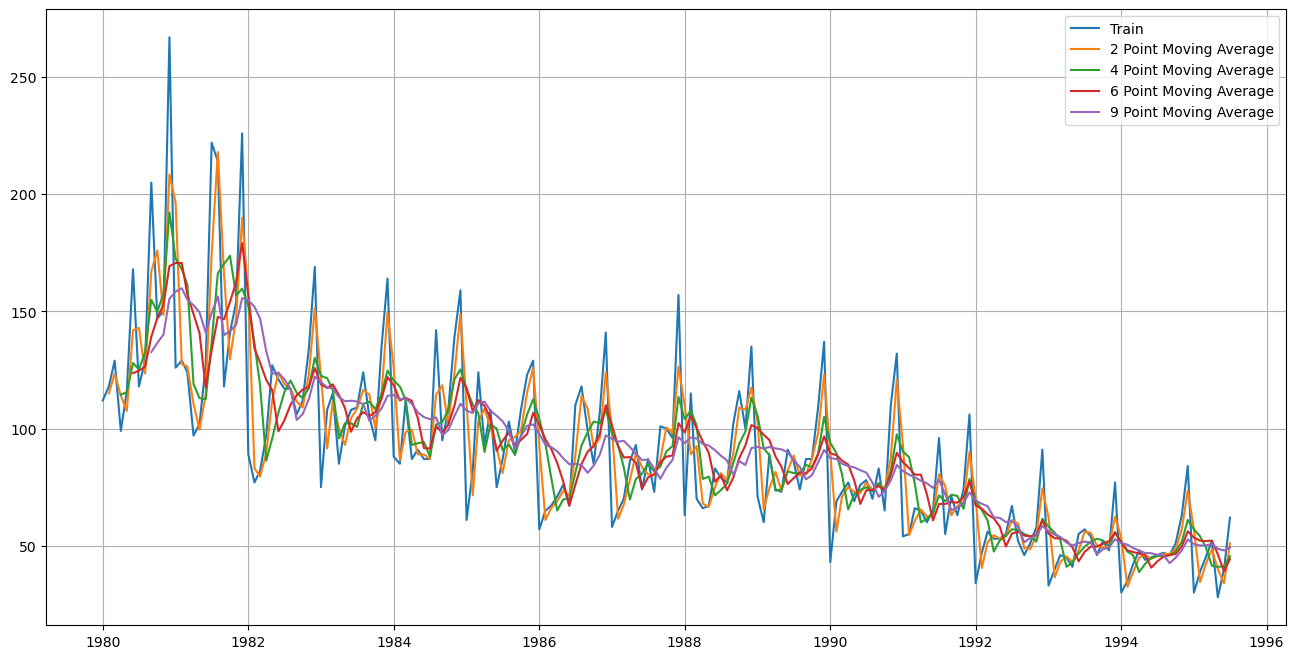

In [46]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [47]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

In [48]:
trailing_MovingAverage_train

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
...,...,...,...,...,...
1990-08-01,70.0,74.0,73.25,73.833333,76.888889
1990-09-01,83.0,76.5,76.75,75.500000,70.888889
1990-10-01,65.0,74.0,74.00,73.500000,73.333333


In [49]:
trailing_MovingAverage_test.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-01,54.0,93.0,90.25,85.666667,81.888889
1991-02-01,55.0,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,62.5,61.50,72.000000,76.666667


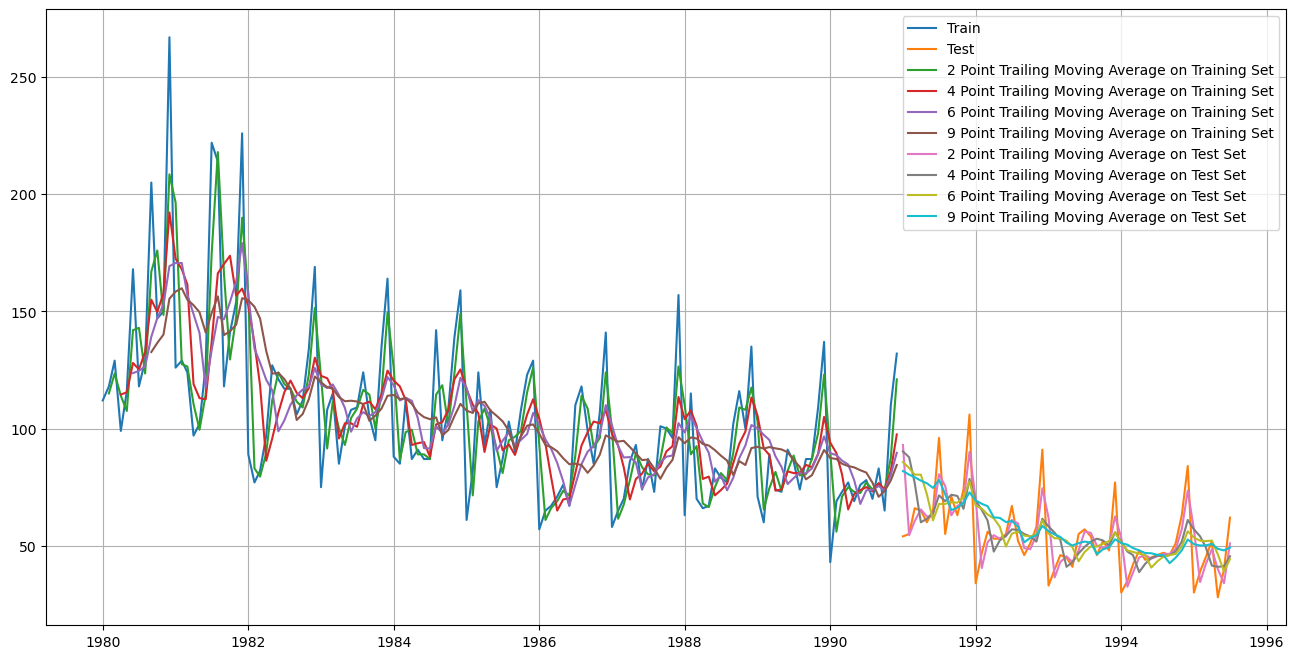

In [50]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [51]:
## 2 point Trailing MA

rmse_model_MA_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model_MA_test_2))

## 4 point Trailing MA

rmse_model_MA_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model_MA_test_4))

## 6 point Trailing MA

rmse_model_MA_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model_MA_test_6))

## 9 point Trailing MA

rmse_model_MA_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.445
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.557
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.722 


In [52]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model_MA_test_2,rmse_model_MA_test_4
                                          ,rmse_model_MA_test_6,rmse_model_MA_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Naive forecast,79.679586
SimpleAverageModel,53.420540
RegressionOnTime,15.257380
2pointTrailingMovingAverage,11.529803
4pointTrailingMovingAverage,14.445234
6pointTrailingMovingAverage,14.556647
9pointTrailingMovingAverage,14.722277


In [53]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [54]:
SES_train = train.copy()
SES_test = test.copy()

In [55]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
model_SES_autofit = model_SES.fit(optimized=True)

In [57]:
print('')
print('==Simple Exponential Smoothing Estimated Parameters ==')
print('')
model_SES_autofit.params


==Simple Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.12362013660706869,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [58]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.983766
1991-02-01,55.0,87.983766
1991-03-01,66.0,87.983766
1991-04-01,65.0,87.983766
1991-05-01,60.0,87.983766


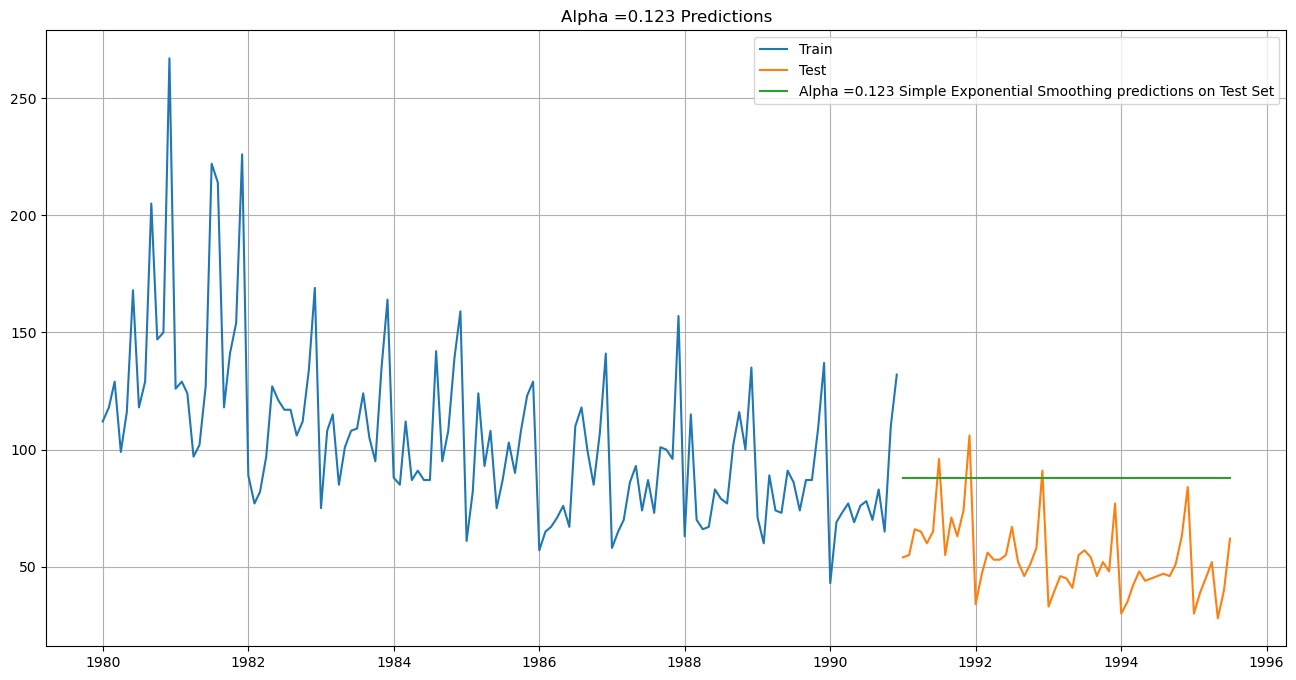

In [59]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.123 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.123 Predictions');

In [60]:
rmse_model_SES_test = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.123 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_SES_test))

For Alpha =0.123 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 37.552


In [61]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model_SES_test]},index=['Alpha=0.123,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Naive forecast,79.679586
SimpleAverageModel,53.420540
RegressionOnTime,15.257380
2pointTrailingMovingAverage,11.529803
4pointTrailingMovingAverage,14.445234
6pointTrailingMovingAverage,14.556647
9pointTrailingMovingAverage,14.722277
"Alpha=0.123,SimpleExponentialSmoothing",37.551686


In [62]:
DES_train = train.copy()
DES_test = test.copy()

In [63]:
model_DES = Holt(DES_train['Rose'],initialization_method='estimated')
model_DES = model_DES.fit(optimized=True)

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [64]:
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.9086427682180844e-08, 'smoothing_trend': 7.302464353829351e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81629861505857, 'initial_trend': -0.4943753249082896, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [65]:
DES_test['predict'] =  model_DES.forecast(steps=len(test))
DES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,72.064380
1991-02-01,55.0,71.570005
1991-03-01,66.0,71.075630
1991-04-01,65.0,70.581254
1991-05-01,60.0,70.086879


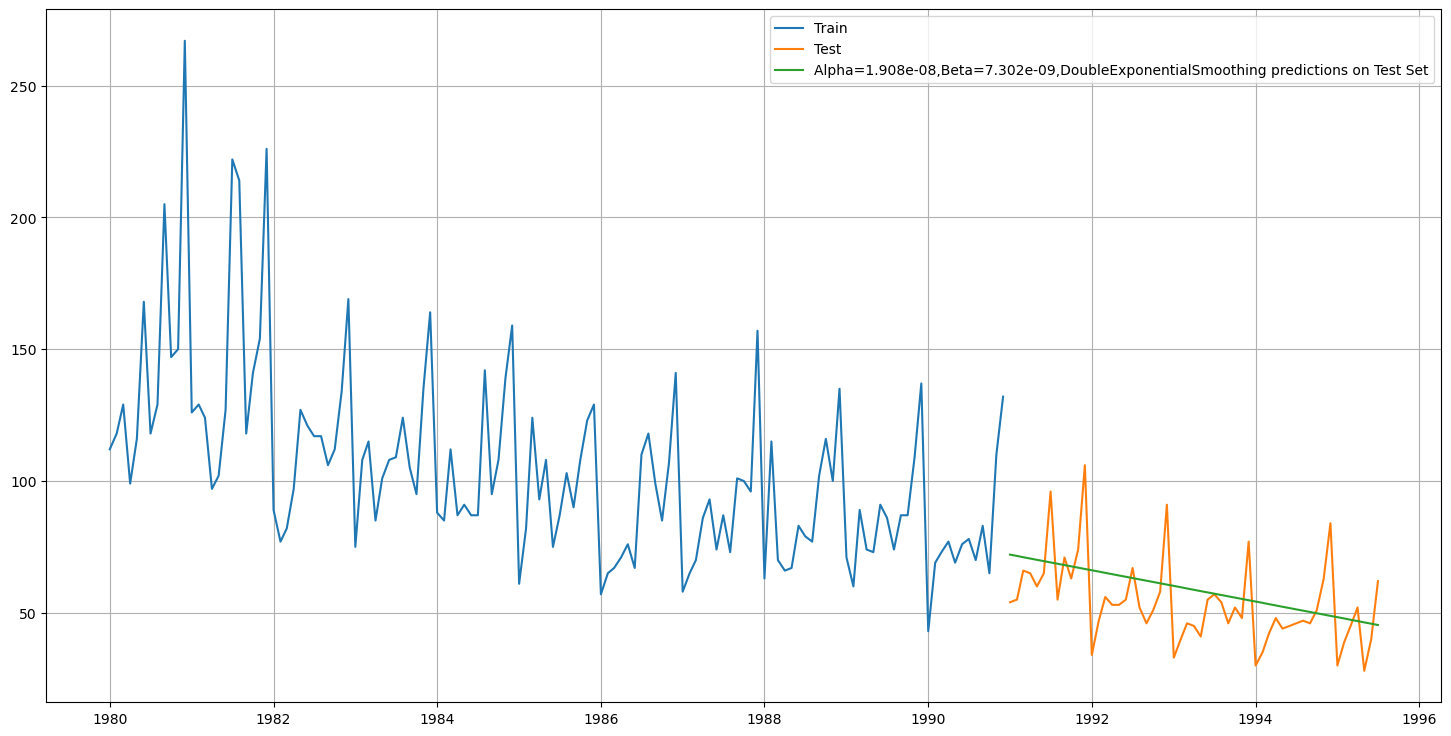

In [66]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [67]:
rmse_model_DES_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing predictions on Test Set, RMSE is %3.3f" %(rmse_model_DES_test))

For Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing predictions on Test Set, RMSE is 15.258


In [68]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model_DES_test]}
                           ,index=['Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
Naive forecast,79.679586
SimpleAverageModel,53.420540
RegressionOnTime,15.257380
2pointTrailingMovingAverage,11.529803
4pointTrailingMovingAverage,14.445234
6pointTrailingMovingAverage,14.556647
9pointTrailingMovingAverage,14.722277
"Alpha=0.123,SimpleExponentialSmoothing",37.551686
"Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing",15.257750


In [69]:
TES_train = train.copy()
TES_test = test.copy()

In [70]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive')

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [71]:
model_TES_autofit = model_TES.fit(optimized=True)

In [72]:
print('')
print('==Holt Triple Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_autofit.params)


==Holt Triple Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08830330642635406, 'smoothing_trend': 6.730635331927582e-05, 'smoothing_seasonal': 0.004455138229351625, 'damping_trend': nan, 'initial_level': 146.88752868155674, 'initial_trend': -0.5492163940406024, 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
       -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
         4.85724354,   2.9520333 ,  21.05004912,  63.29916317]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [73]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,42.672382
1991-02-01,55.0,54.439917
1991-03-01,66.0,61.841877
1991-04-01,65.0,50.636896
1991-05-01,60.0,58.918913


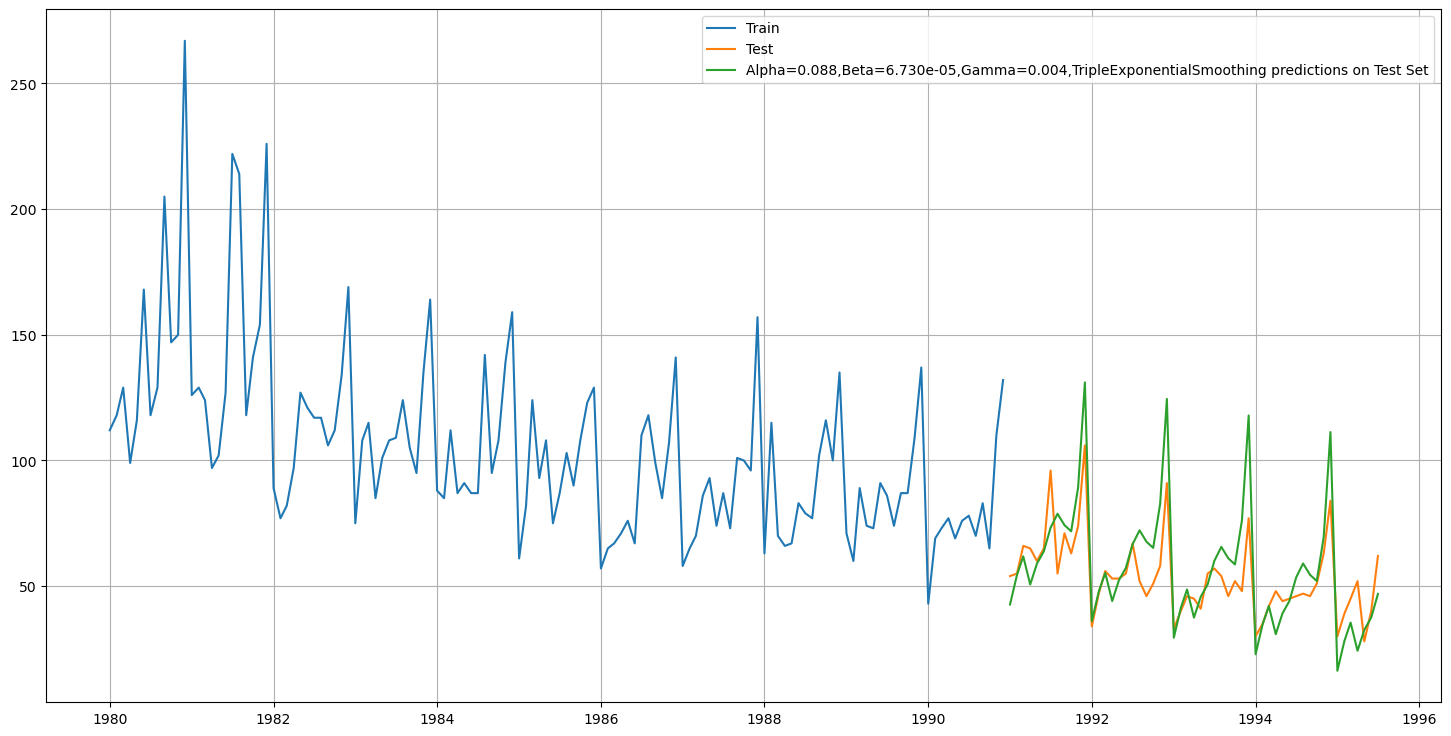

In [74]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.088,Beta=6.730e-05,Gamma=0.004,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [75]:
rmse_model_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.088,Beta=6.730e-05,Gamma=0.004, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_TES_test))

For Alpha=0.088,Beta=6.730e-05,Gamma=0.004, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.237


In [76]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model_TES_test]}
                           ,index=['Alpha=0.088,Beta=6.730e-05,Gamma=0.004,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
Naive forecast,79.679586
SimpleAverageModel,53.420540
RegressionOnTime,15.257380
2pointTrailingMovingAverage,11.529803
4pointTrailingMovingAverage,14.445234
6pointTrailingMovingAverage,14.556647
9pointTrailingMovingAverage,14.722277
"Alpha=0.123,SimpleExponentialSmoothing",37.551686
"Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing",15.257750
"Alpha=0.088,Beta=6.730e-05,Gamma=0.004,TripleExponentialSmoothing",14.237498


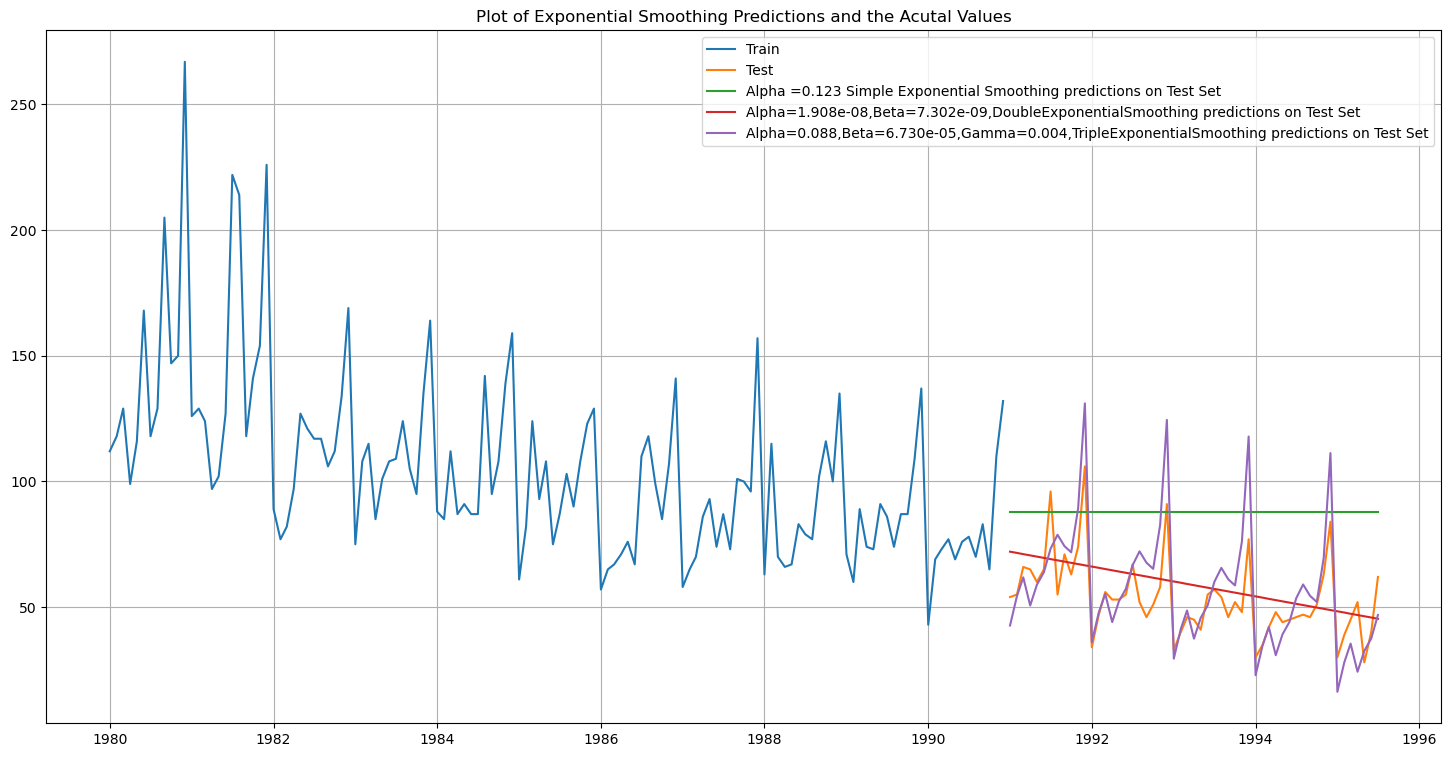

In [77]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.123 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.088,Beta=6.730e-05,Gamma=0.004,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [78]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
2pointTrailingMovingAverage,11.529803
"Alpha=0.088,Beta=6.730e-05,Gamma=0.004,TripleExponentialSmoothing",14.237498
4pointTrailingMovingAverage,14.445234
6pointTrailingMovingAverage,14.556647
9pointTrailingMovingAverage,14.722277
RegressionOnTime,15.257380
"Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing",15.257750
"Alpha=0.123,SimpleExponentialSmoothing",37.551686
SimpleAverageModel,53.420540
Naive forecast,79.679586


* Based on the models so far 2 Point moving average has the best RMSE.

<font color = "blue">
<font size = 5>
5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [79]:
from statsmodels.tsa.stattools import adfuller

In [80]:
rose_ts = df['Rose']

In [81]:
dftest = adfuller(rose_ts)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.880
DF test p-value is 0.3414


* The time series is not stationary.

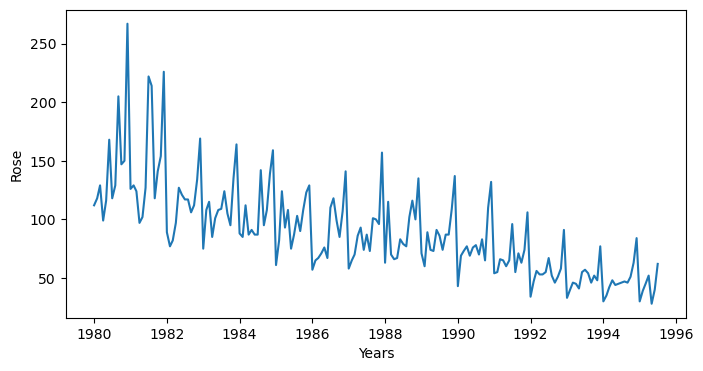

In [82]:
plt.figure(figsize=(8, 4))
plt.plot(rose_ts)
plt.xlabel('Years')
plt.ylabel('Rose')
plt.show()

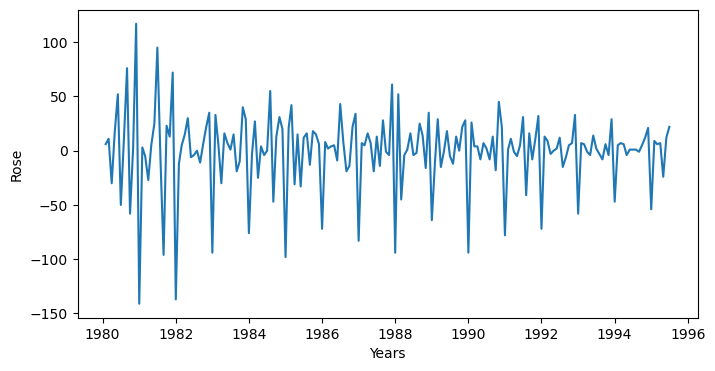

In [83]:
plt.figure(figsize=(8, 4))
plt.plot(rose_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Rose')
plt.show()

In [84]:
rose_ts_1 = rose_ts.diff(periods=1).dropna()
rose_ts_1

YearMonth
1980-02-01     6.0
1980-03-01    11.0
1980-04-01   -30.0
1980-05-01    17.0
1980-06-01    52.0
              ... 
1995-03-01     6.0
1995-04-01     7.0
1995-05-01   -24.0
1995-06-01    12.0
1995-07-01    22.0
Name: Rose, Length: 186, dtype: float64

In [85]:
dftest = adfuller(rose_ts_1)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -8.045
DF test p-value is 0.0000


* The Time series is stationary after a lag of one.

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

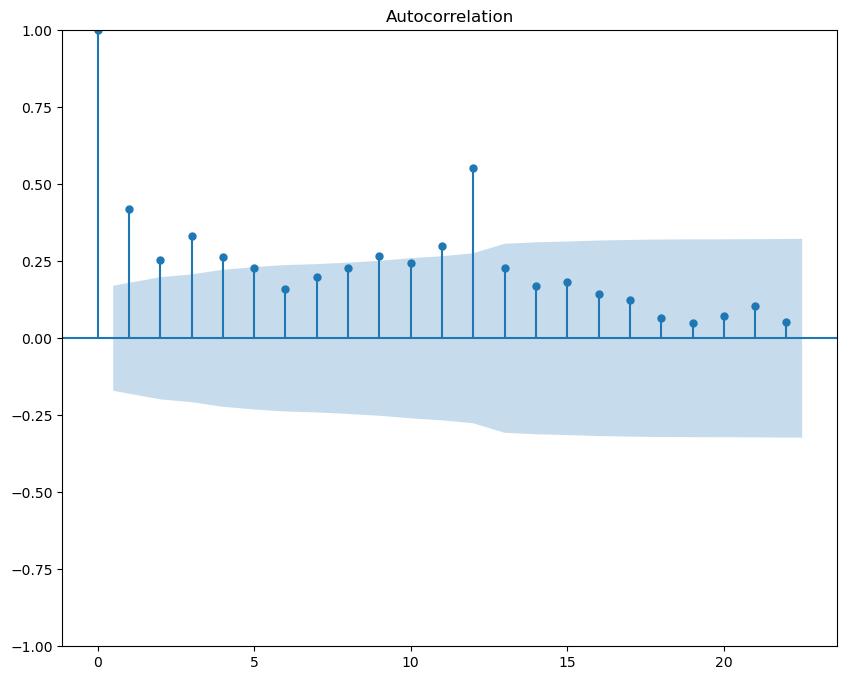

In [87]:
plot_acf(train['Rose'],alpha=0.05);

* The auto correlation shows the positive and negative correlation of the data with its lag data series. 
* There are several autocorrelation that ate significantly non-zero. Therefore, the time series is non-random.
* High degree of autocorrelation at lag 12 and 1.

<font color = "blue">
<font size = 5>
6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [88]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [89]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [90]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)           
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1180.1133206671127
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1143.070522763001


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1145.0694525859803


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:1145.6819913661634
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1152.9230017557559


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1145.0689683136334


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1146.519747135231


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:1148.826334554885
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1149.4184446480817


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1145.86672972891


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1148.4612597571072


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:1150.2278545001022


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1151.0498571415992


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1147.701895713736


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1148.1726757804365


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:1150.5364032190705
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1132.0360347496276
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1091.9283273562623


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1093.6269103792795


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1)x(0, 1, 3, 12)7 - AIC:1095.2192299429828
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1101.0597790052939


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1093.565529499705


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1095.3042349680975


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1)x(1, 1, 3, 12)7 - AIC:1096.646366477459


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1096.3263779138115


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1095.6550269213135


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1096.3272473883824


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1)x(2, 1, 3, 12)7 - AIC:1096.6027784703144


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 1, 0, 12)7 - AIC:1097.7848233656398


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 1, 1, 12)7 - AIC:1097.0773165508142


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 1, 2, 12)7 - AIC:1097.1874540323581


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1)x(3, 1, 3, 12)7 - AIC:1098.4789746817223
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1125.1626708228964


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:1090.1164472407513


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:1092.0646974315118


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 2)x(0, 1, 3, 12)7 - AIC:1093.4168430790608
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:1098.7337664326276


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:1092.0478902496943


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:1093.547518863786


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 2)x(1, 1, 3, 12)7 - AIC:1095.2865921970042


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:1095.0259689462791


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:1093.4912370995908


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:1095.1850446229753


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 2)x(2, 1, 3, 12)7 - AIC:1095.7178034896174


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 1, 0, 12)7 - AIC:1096.53527600303


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 1, 1, 12)7 - AIC:1095.2108370846856


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 1, 2, 12)7 - AIC:1095.6783353501385


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 2)x(3, 1, 3, 12)7 - AIC:1097.115720305395
SARIMA(0, 1, 3)x(0, 1, 0, 12)7 - AIC:1124.0775764443167


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 1, 1, 12)7 - AIC:1087.125400005318


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 1, 2, 12)7 - AIC:1089.1169931647098


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 3)x(0, 1, 3, 12)7 - AIC:1090.8316324344412
SARIMA(0, 1, 3)x(1, 1, 0, 12)7 - AIC:1097.3276385296554


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 1, 1, 12)7 - AIC:1089.1155110124844


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 1, 2, 12)7 - AIC:1090.7270126525732


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 3)x(1, 1, 3, 12)7 - AIC:1092.8257972991157


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 1, 0, 12)7 - AIC:1093.4169330478162


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 1, 1, 12)7 - AIC:1090.869292899058


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 1, 2, 12)7 - AIC:1092.5956264610907


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 3)x(2, 1, 3, 12)7 - AIC:1093.3738537877543


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 1, 0, 12)7 - AIC:1094.2938455458846


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 1, 1, 12)7 - AIC:1092.837546286977


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 1, 2, 12)7 - AIC:1093.8072365445707


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 3)x(3, 1, 3, 12)7 - AIC:1094.7669596910628
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1173.4221788279945
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:1131.9629700843084


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:1133.7504079015096


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0)x(0, 1, 3, 12)7 - AIC:1134.21522547229
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:1141.246336485624


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:1133.6513479890973


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:1135.225978606286


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0)x(1, 1, 3, 12)7 - AIC:1136.0789331636336
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:1136.3390854683846


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:1134.628783128925


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:1136.1732026653938


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0)x(2, 1, 3, 12)7 - AIC:1136.1762487805095


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 1, 0, 12)7 - AIC:1138.248551532666


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 1, 1, 12)7 - AIC:1136.0294566206924


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 1, 2, 12)7 - AIC:1135.3734755280648


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0)x(3, 1, 3, 12)7 - AIC:1136.7852740591622
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1128.5724891707334


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:1091.625268301527


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:1093.4710557123549


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1)x(0, 1, 3, 12)7 - AIC:1094.873735522121
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:1100.2313402209766


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:1093.427480398527


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:1095.0204847985344


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1)x(1, 1, 3, 12)7 - AIC:1096.6075246965106


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:1096.1233867881112


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:1094.9937157080565


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:1096.3653904395735


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1)x(2, 1, 3, 12)7 - AIC:1096.7896537732042


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 1, 0, 12)7 - AIC:1097.689684385625


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 1, 1, 12)7 - AIC:1096.6275907993524


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 1, 2, 12)7 - AIC:1096.8918415703188


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1)x(3, 1, 3, 12)7 - AIC:1098.2574136745486
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1123.1171539710676


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:1087.2145831734754


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:1089.1931718843268


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 2)x(0, 1, 3, 12)7 - AIC:1090.8110647558963
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:1096.7733615856903


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:1089.1884043744587


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:1090.6542743014986


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 2)x(1, 1, 3, 12)7 - AIC:1092.7561744584145


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:1092.6129632115799


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:1090.8699362992375


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:1092.4073942006723


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 2)x(2, 1, 3, 12)7 - AIC:1093.0712342247919


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 0, 12)7 - AIC:1093.9864805909742


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 1, 12)7 - AIC:1092.7008111455475


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 2, 12)7 - AIC:1093.2830258026906


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 2)x(3, 1, 3, 12)7 - AIC:1094.5519491425405
SARIMA(1, 1, 3)x(0, 1, 0, 12)7 - AIC:1123.5974145175346


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 1, 1, 12)7 - AIC:1088.691621054315


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 1, 2, 12)7 - AIC:1090.6671451634618


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 3)x(0, 1, 3, 12)7 - AIC:1092.370285112702
SARIMA(1, 1, 3)x(1, 1, 0, 12)7 - AIC:1098.6487784781416


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 1, 1, 12)7 - AIC:1090.662679199517


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 1, 2, 12)7 - AIC:1092.2064397814468


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 3)x(1, 1, 3, 12)7 - AIC:1094.352073706397


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 1, 0, 12)7 - AIC:1094.407793396036


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 1, 1, 12)7 - AIC:1092.4204970060716


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 1, 2, 12)7 - AIC:1093.9653489085113


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 3)x(2, 1, 3, 12)7 - AIC:1094.5900452885496


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 1, 0, 12)7 - AIC:1095.6265596852736


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 1, 1, 12)7 - AIC:1094.334445661837


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 1, 2, 12)7 - AIC:1095.0253448470387


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 3)x(3, 1, 3, 12)7 - AIC:1096.1018860931815
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1151.2547840882876


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:1109.4967480213109


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:1111.442504506482


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 0)x(0, 1, 3, 12)7 - AIC:1112.377955102065
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:1118.8686824870488


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:1111.4244090965672


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:1112.461996315514


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 0)x(1, 1, 3, 12)7 - AIC:1114.3727004104487
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:1115.4212740925407


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:1112.7020629087383


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:1113.8232852342305


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 0)x(2, 1, 3, 12)7 - AIC:1116.8762160027975


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 1, 0, 12)7 - AIC:1117.0582587057932


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 1, 1, 12)7 - AIC:1114.6616738422765


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 1, 2, 12)7 - AIC:1113.6501539534652


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 0)x(3, 1, 3, 12)7 - AIC:1113.6715915168988
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1125.1244389011122


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:1089.2403165592439


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:1091.2234156288293


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 1)x(0, 1, 3, 12)7 - AIC:1093.188192934504


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:1099.0205390746846


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1091.2199325594968


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1092.7657261653044


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:1094.9304809268035


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1095.1626129079716


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1093.0662593840332


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1094.584152199097


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:1095.3071854342766


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1096.1239868353352


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1094.8867434200333


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1095.6821219528981


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:1096.966791426709
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1124.2123131498665


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1088.7975284059783


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1090.7681985224465


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:1092.4466670748182


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1098.6636911088956


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1090.7625672942806


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1092.2943242085328


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:1094.4238955964543


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1094.425044416805


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1092.5027335862007


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:1094.0314231006141


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 2)x(2, 1, 3, 12)7 - AIC:1094.731761329499


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 1, 0, 12)7 - AIC:1095.6804709887706


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 1, 1, 12)7 - AIC:1094.3993076349511


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 1, 2, 12)7 - AIC:1095.0512731499955


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 2)x(3, 1, 3, 12)7 - AIC:1096.1353291620217


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 1, 0, 12)7 - AIC:1124.903347872658


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 1, 1, 12)7 - AIC:1090.4262968861556


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 1, 2, 12)7 - AIC:1092.3997388654357


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 3)x(0, 1, 3, 12)7 - AIC:1094.1359088198278


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 1, 0, 12)7 - AIC:1100.6302819484472


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 1, 1, 12)7 - AIC:1092.3952415632805


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 1, 2, 12)7 - AIC:1094.016129216306


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 3)x(1, 1, 3, 12)7 - AIC:1096.1197234972649


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 1, 0, 12)7 - AIC:1096.3355088791798


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 1, 1, 12)7 - AIC:1094.178450784846


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 1, 2, 12)7 - AIC:1095.8067056120237


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 3)x(2, 1, 3, 12)7 - AIC:1096.697797267775


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 1, 0, 12)7 - AIC:1097.465342537567


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 1, 1, 12)7 - AIC:1096.1038812429163


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 1, 2, 12)7 - AIC:1096.9510980624311


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(2, 1, 3)x(3, 1, 3, 12)7 - AIC:1098.0774144357356
SARIMA(3, 1, 0)x(0, 1, 0, 12)7 - AIC:1145.8457028326375


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 1, 1, 12)7 - AIC:1107.7826791013642


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 1, 2, 12)7 - AIC:1109.7712130947655


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 0)x(0, 1, 3, 12)7 - AIC:1110.9109085493112
SARIMA(3, 1, 0)x(1, 1, 0, 12)7 - AIC:1116.9376634643793


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 1, 1, 12)7 - AIC:1109.7676004216842


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 1, 2, 12)7 - AIC:1110.5227896320566


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 0)x(1, 1, 3, 12)7 - AIC:1112.9093376869016


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 1, 0, 12)7 - AIC:1113.9071155059876


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 1, 1, 12)7 - AIC:1111.1170871390598


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 1, 2, 12)7 - AIC:1112.0965751218491


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 0)x(2, 1, 3, 12)7 - AIC:1111.7508280540842


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 1, 0, 12)7 - AIC:1115.3252690066129


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 1, 1, 12)7 - AIC:1113.0899539718241


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 1, 2, 12)7 - AIC:1112.1653804283885


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 0)x(3, 1, 3, 12)7 - AIC:1112.128677272488
SARIMA(3, 1, 1)x(0, 1, 0, 12)7 - AIC:1126.3076737382378


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 1, 1, 12)7 - AIC:1090.6850932417221


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 1, 2, 12)7 - AIC:1092.6677034841314


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 1)x(0, 1, 3, 12)7 - AIC:1094.5494137259875


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 1, 0, 12)7 - AIC:1099.8213344979242


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 1, 1, 12)7 - AIC:1092.6636581932396


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 1, 2, 12)7 - AIC:1094.14111619162


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 1)x(1, 1, 3, 12)7 - AIC:1095.9907338525454


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 1, 0, 12)7 - AIC:1096.4030658907159


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 1, 1, 12)7 - AIC:1094.2989616958907


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 1, 2, 12)7 - AIC:1095.9230035777919


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 1)x(2, 1, 3, 12)7 - AIC:1096.324839406026


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 1, 0, 12)7 - AIC:1097.5313376466042


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 1, 1, 12)7 - AIC:1096.2800024533128


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 1, 2, 12)7 - AIC:1096.858148695077


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 1)x(3, 1, 3, 12)7 - AIC:1097.8855546649997
SARIMA(3, 1, 2)x(0, 1, 0, 12)7 - AIC:1124.0909531429536


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 1, 1, 12)7 - AIC:1090.6300854084093


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 1, 2, 12)7 - AIC:1092.6157543353365


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 2)x(0, 1, 3, 12)7 - AIC:1094.324825041672


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 1, 0, 12)7 - AIC:1100.5801972542695


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 1, 1, 12)7 - AIC:1092.6130497777435


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 1, 2, 12)7 - AIC:1094.1203645967646


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 2)x(1, 1, 3, 12)7 - AIC:1096.301234508393


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 1, 0, 12)7 - AIC:1096.3874179545016


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 1, 1, 12)7 - AIC:1094.3686499665375


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 1, 2, 12)7 - AIC:1095.9219782022908


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 2)x(2, 1, 3, 12)7 - AIC:1096.6806947674932


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 1, 0, 12)7 - AIC:1097.574812951562


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 1, 1, 12)7 - AIC:1096.2788857506096


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 1, 2, 12)7 - AIC:1097.0001875623873


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(3, 1, 2)x(3, 1, 3, 12)7 - AIC:1098.0983621662115


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(0, 1, 0, 12)7 - AIC:1126.026338535361


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(0, 1, 1, 12)7 - AIC:1092.39788005511


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(0, 1, 2, 12)7 - AIC:1094.3760017788284


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('

SARIMA(3, 1, 3)x(0, 1, 3, 12)7 - AIC:1096.117650193195


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(1, 1, 0, 12)7 - AIC:1102.558668654037


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(1, 1, 1, 12)7 - AIC:1094.3722668130324


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(1, 1, 2, 12)7 - AIC:1095.9902517257656


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('

SARIMA(3, 1, 3)x(1, 1, 3, 12)7 - AIC:1098.1000399832203


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(2, 1, 0, 12)7 - AIC:1098.3339056152554


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(2, 1, 1, 12)7 - AIC:1096.1575643095969


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(2, 1, 2, 12)7 - AIC:1097.7975853020484


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('

SARIMA(3, 1, 3)x(2, 1, 3, 12)7 - AIC:1098.6423043767513


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(3, 1, 0, 12)7 - AIC:1099.453783158535


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(3, 1, 1, 12)7 - AIC:1098.0825935882322


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3)x(3, 1, 2, 12)7 - AIC:1098.9498556493666


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('

SARIMA(3, 1, 3)x(3, 1, 3, 12)7 - AIC:1100.0757457125887


C:\Users\skrsk\AppData\Local\Temp\ipykernel_12056\1549857154.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [91]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
49,"(0, 1, 3)","(0, 1, 1, 12)",1087.125400
97,"(1, 1, 2)","(0, 1, 1, 12)",1087.214583
113,"(1, 1, 3)","(0, 1, 1, 12)",1088.691621
161,"(2, 1, 2)","(0, 1, 1, 12)",1088.797528
53,"(0, 1, 3)","(1, 1, 1, 12)",1089.115511


In [92]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0,1,3),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results_SARIMA_ses_diff = mod.fit()
print(results_SARIMA_ses_diff.summary())

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -538.563
Date:                              Sat, 16 Dec 2023   AIC                           1087.125
Time:                                      12:15:40   BIC                           1101.021
Sample:                                  01-01-1980   HQIC                          1092.768
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7088      0.086     -8.277      0.000      -0.877      -0.541
ma.L2         -0.40

In [93]:
predicted_autoSARIMA_ses_diff = results_SARIMA_ses_diff.forecast(steps=len(test))
predicted_autoSARIMA_ses_diff

1991-01-01     38.219588
1991-02-01     62.202046
1991-03-01     65.170480
1991-04-01     59.055006
1991-05-01     61.965058
1991-06-01     66.278830
1991-07-01     72.519798
1991-08-01     72.067321
1991-09-01     76.954508
1991-10-01     74.099298
1991-11-01     93.341247
1991-12-01    127.444802
1992-01-01     37.670494
1992-02-01     54.876784
1992-03-01     59.738404
1992-04-01     53.622930
1992-05-01     56.532982
1992-06-01     60.846754
1992-07-01     67.087722
1992-08-01     66.635245
1992-09-01     71.522432
1992-10-01     68.667223
1992-11-01     87.909171
1992-12-01    122.012726
1993-01-01     32.238419
1993-02-01     49.444709
1993-03-01     54.306328
1993-04-01     48.190854
1993-05-01     51.100906
1993-06-01     55.414678
1993-07-01     61.655647
1993-08-01     61.203169
1993-09-01     66.090356
1993-10-01     63.235147
1993-11-01     82.477095
1993-12-01    116.580650
1994-01-01     26.806343
1994-02-01     44.012633
1994-03-01     48.874253
1994-04-01     42.758778


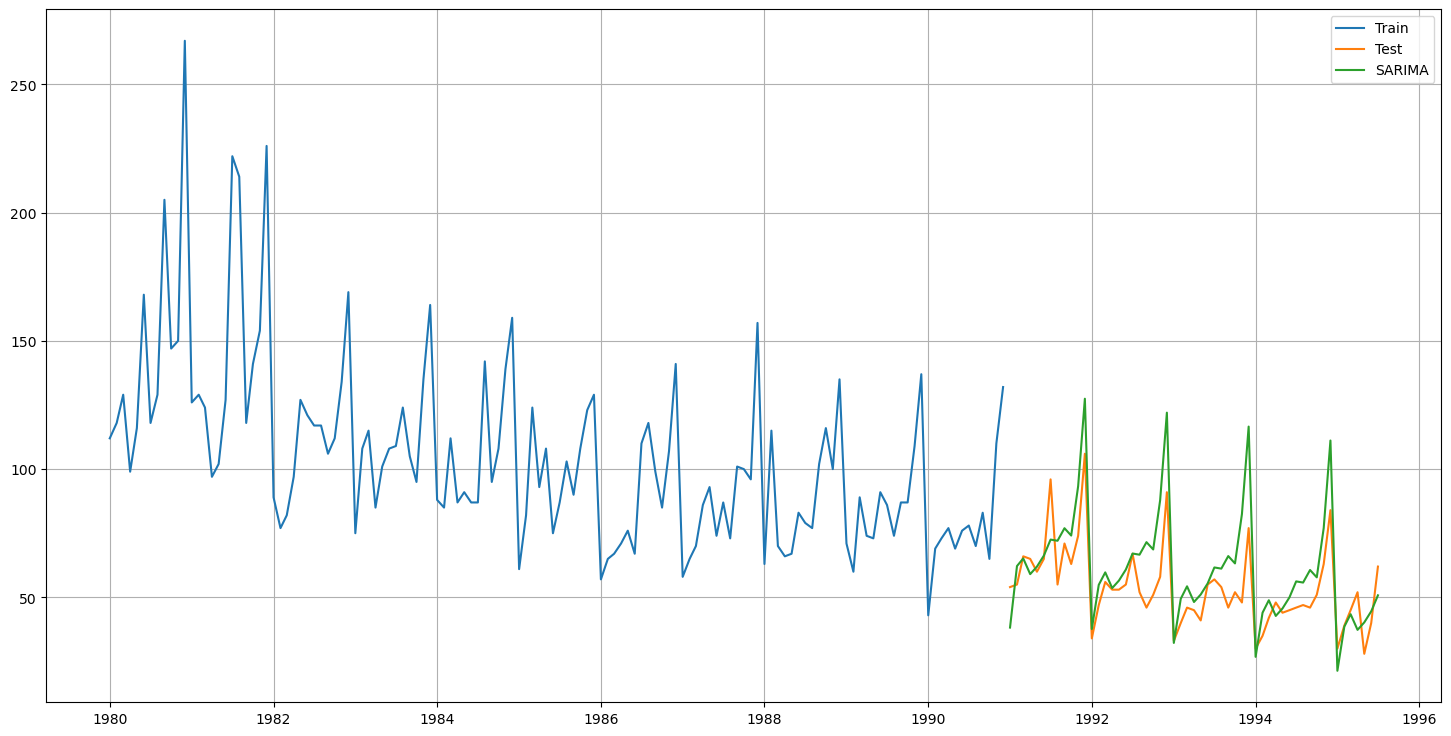

In [94]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_autoSARIMA_ses_diff, label='SARIMA')

plt.legend(loc='best')
plt.grid();

In [95]:
RMSE_autoSARIMA_ses_diff = metrics.mean_squared_error(test['Rose'],predicted_autoSARIMA_ses_diff,squared=False)
print("For SARIMA Model forecast on the Test Data,  RMSE is %3.3f" %(RMSE_autoSARIMA_ses_diff))

For SARIMA Model forecast on the Test Data,  RMSE is 14.230


In [96]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA_ses_diff]}
                           ,index=['SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
Naive forecast,79.679586
SimpleAverageModel,53.420540
RegressionOnTime,15.257380
2pointTrailingMovingAverage,11.529803
4pointTrailingMovingAverage,14.445234
6pointTrailingMovingAverage,14.556647
9pointTrailingMovingAverage,14.722277
"Alpha=0.123,SimpleExponentialSmoothing",37.551686
"Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing",15.257750
"Alpha=0.088,Beta=6.730e-05,Gamma=0.004,TripleExponentialSmoothing",14.237498


<font color = "blue">
<font size = 5>
7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [97]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE']).round(2)

Sorted by RMSE values on the Test Data: 



,Test RMSE
2pointTrailingMovingAverage,11.53
SARIMA,14.23
"Alpha=0.088,Beta=6.730e-05,Gamma=0.004,TripleExponentialSmoothing",14.24
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.56
9pointTrailingMovingAverage,14.72
RegressionOnTime,15.26
"Alpha=1.908e-08,Beta=7.302e-09,DoubleExponentialSmoothing",15.26
"Alpha=0.123,SimpleExponentialSmoothing",37.55
SimpleAverageModel,53.42


### The underlying trend detected by moving averages is not linear or pattern-based. Thus, without rerunning the model, we cannot use past trends to predict the future beyond a certain point. Clearly the Moving Average Method gives the average trend. It does not reflect the peak and troughs of the actual data.

* The Next Best model is SARIMA with lowest RMSE of 14.23.

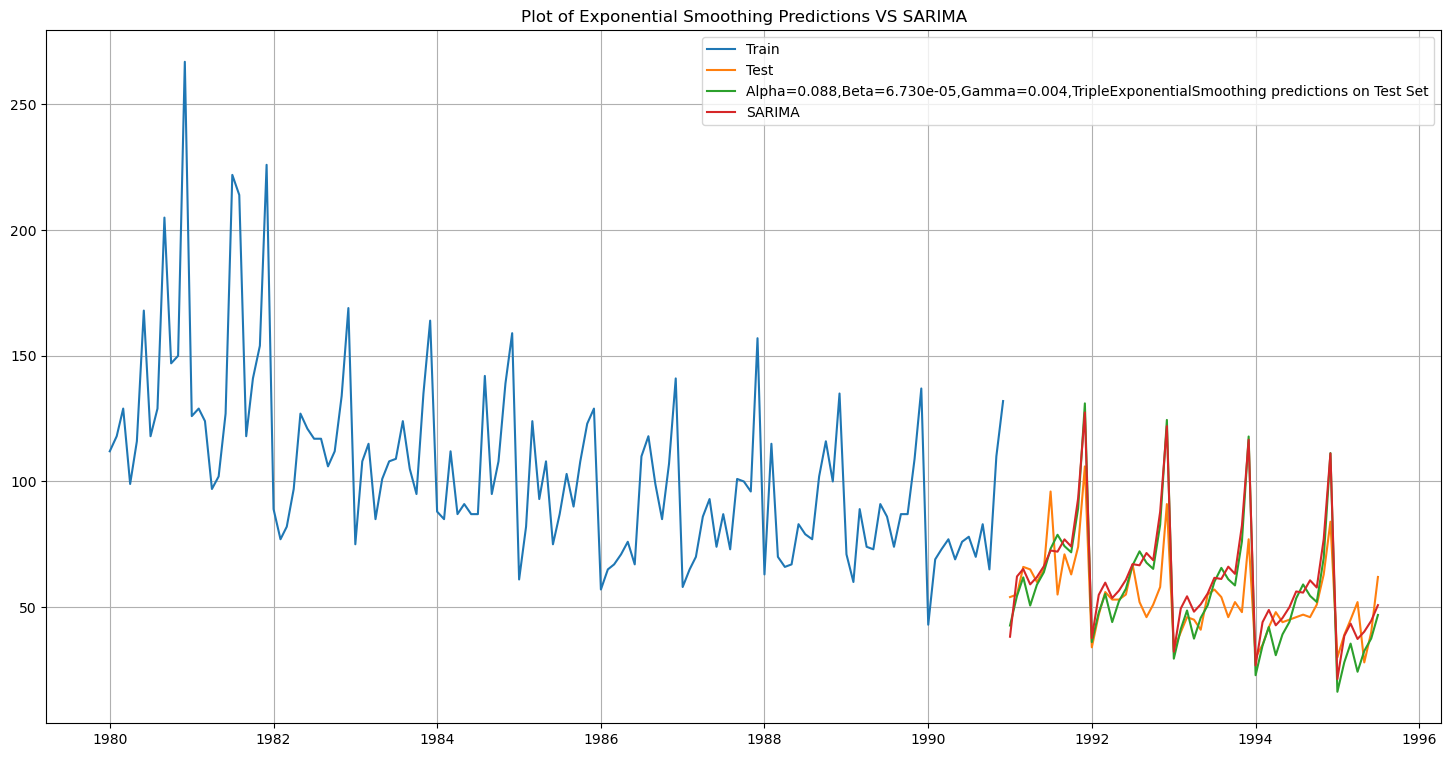

In [98]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.088,Beta=6.730e-05,Gamma=0.004,TripleExponentialSmoothing predictions on Test Set')
plt.plot(predicted_autoSARIMA_ses_diff, label='SARIMA')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions VS SARIMA');

<font color = "blue">
<font size = 5>
8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [99]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,1,3),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results_SARIMA_fullmodel = mod.fit()
print(results_SARIMA_fullmodel.summary())

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -760.467
Date:                              Sat, 16 Dec 2023   AIC                           1530.935
Time:                                      12:15:41   BIC                           1546.730
Sample:                                  01-01-1980   HQIC                          1537.342
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7122      0.063    -11.273      0.000      -0.836      -0.588
ma.L2         -0.36

In [100]:
pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1995-08-01'), dynamic=True)

In [101]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [102]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [103]:
forecast_fullmodel_autosarima = pred95.predicted_mean

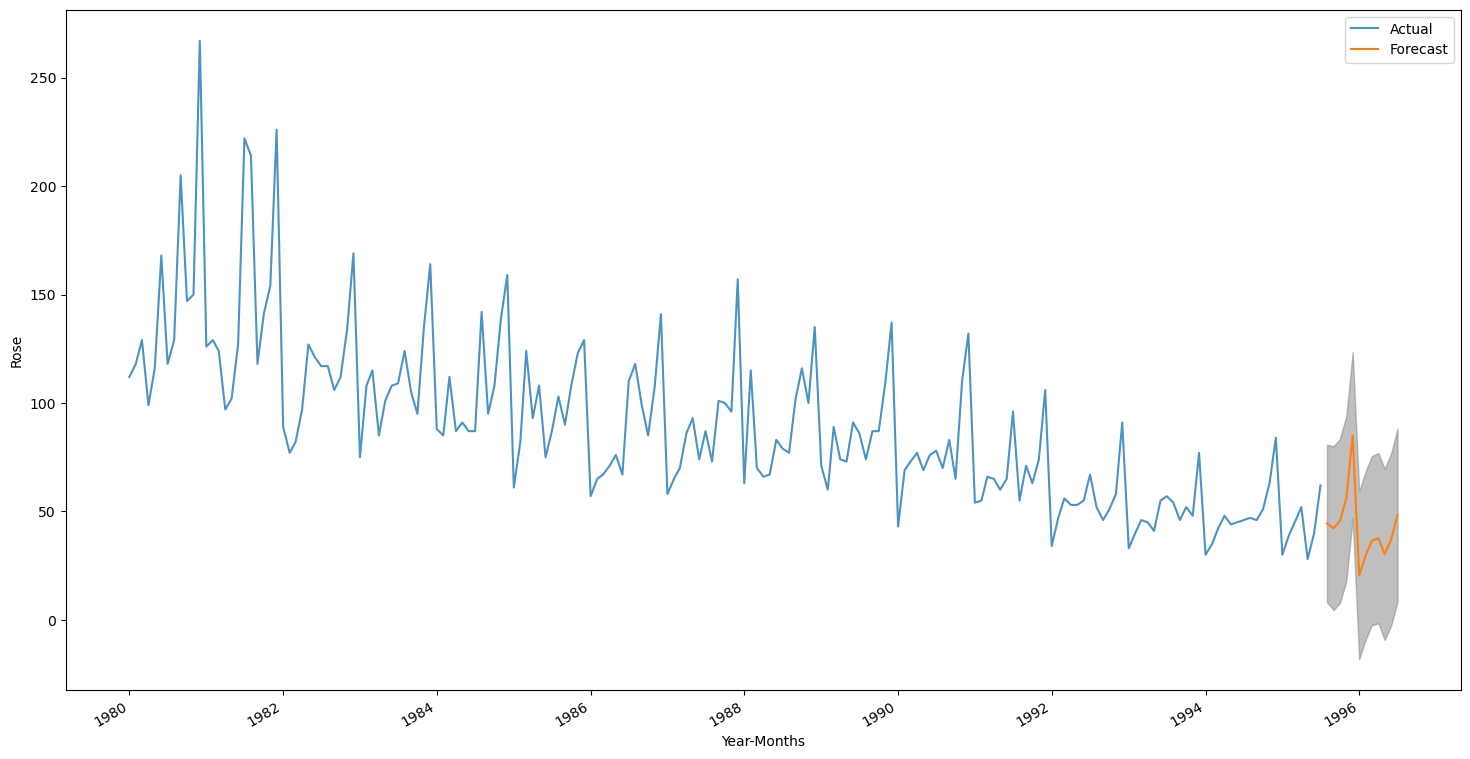

In [104]:
plt.figure(figsize=(18,10))
plt.plot(df.index,df['Rose'], label='Actual',alpha=0.8)
forecast_fullmodel_autosarima.plot(label='Forecast')
plt.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='Grey', alpha=0.5)
plt.xlabel('Year-Months')
plt.ylabel('Rose')
plt.legend(loc='best')
plt.show()

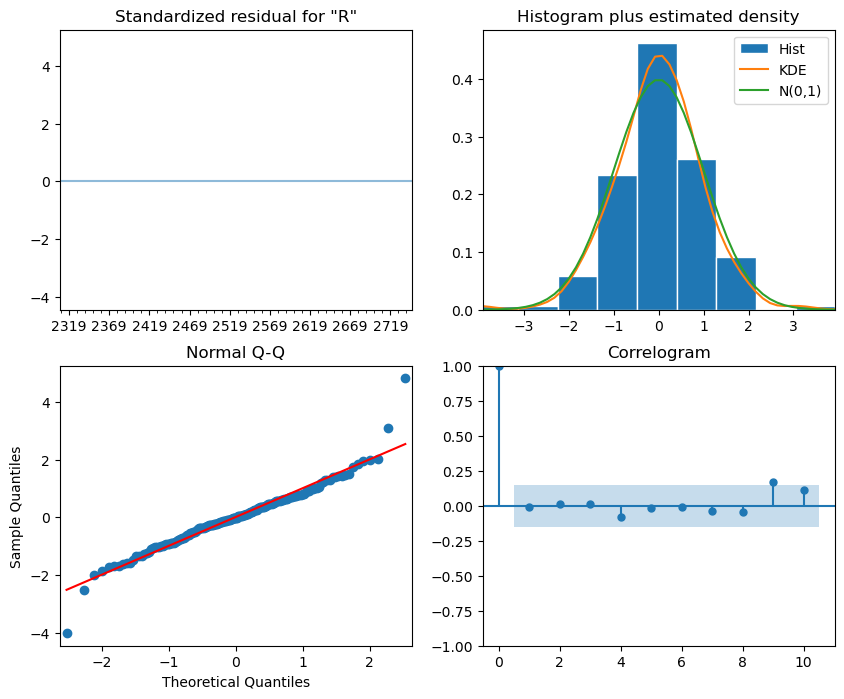

In [105]:
results_SARIMA_fullmodel.plot_diagnostics();